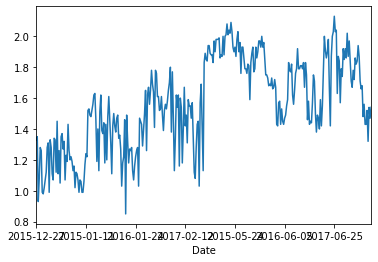

In [7]:
import pandas as pd

df = pd.read_csv("datasets/avocado.csv")
# df['Date'] = pd.to_datetime(df["Date"])
albany_df = df[df["region"]=="Albany"]
albany_df.set_index("Date", inplace=True)
albany_df["AveragePrice"].plot();


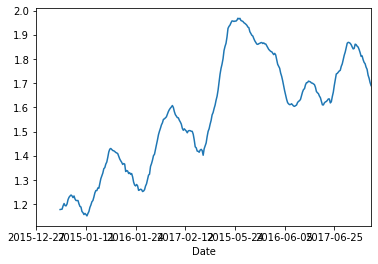

In [5]:
albany_df['AveragePrice'].rolling(25).mean().plot()

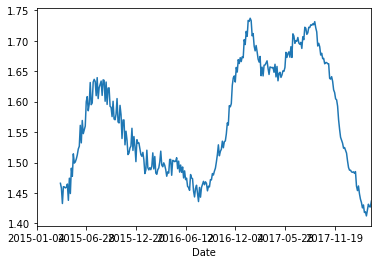

In [17]:
albany_df.sort_index(inplace=True)
albany_df['AveragePrice'].rolling(25).mean().plot()

In [20]:
albany_df['price25ma'] = albany_df['AveragePrice'].rolling(25).mean()

c:\users\damian\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
albany_df.head(3)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-01-04,51,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,NaN
2015-01-04,51,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,NaN
2015-01-11,50,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,NaN


In [22]:
albany_df.tail(3)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2018-03-18,1,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.0,conventional,2018,Albany,1.4276
2018-03-25,0,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.0,conventional,2018,Albany,1.4272
2018-03-25,0,1.71,2321.82,42.95,272.41,0.00,2006.46,1996.46,10.00,0.0,organic,2018,Albany,1.4368


In [24]:
# Drops records that dont have any value
# albany_df.dropna().head(3)

In [25]:
# The same things we did earlier but without any warning
albany_df = df.copy()[df["region"] == "Albany"] # diffrence
albany_df.set_index("Date", inplace=True)
albany_df.sort_index(inplace=True)
albany_df['price25ma'] = albany_df['AveragePrice'].rolling(25).mean()

In [27]:
list(set(df['region'].values.tolist()))

['Syracuse',
 'Denver',
 'SouthCentral',
 'Jacksonville',
 'Tampa',
 'HarrisburgScranton',
 'TotalUS',
 'SanDiego',
 'LosAngeles',
 'Albany',
 'Sacramento',
 'Midsouth',
 'SanFrancisco',
 'Columbus',
 'HartfordSpringfield',
 'Houston',
 'West',
 'Pittsburgh',
 'Nashville',
 'Indianapolis',
 'WestTexNewMexico',
 'NewOrleansMobile',
 'Charlotte',
 'RaleighGreensboro',
 'LasVegas',
 'Orlando',
 'NorthernNewEngland',
 'Plains',
 'Detroit',
 'Portland',
 'MiamiFtLauderdale',
 'Southeast',
 'Chicago',
 'Northeast',
 'BuffaloRochester',
 'StLouis',
 'GreatLakes',
 'GrandRapids',
 'Philadelphia',
 'BaltimoreWashington',
 'Atlanta',
 'DallasFtWorth',
 'Roanoke',
 'PhoenixTucson',
 'Boise',
 'NewYork',
 'California',
 'Boston',
 'SouthCarolina',
 'Louisville',
 'CincinnatiDayton',
 'Spokane',
 'Seattle',
 'RichmondNorfolk']

In [28]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [33]:
graph_df = pd.DataFrame()

for region in df['region'].unique()[:16]:
    print(region)
    region_df = df.copy()[df['region']==region]
    region_df.set_index("Date", inplace=True)
    region_df.sort_index(inplace=True)
    region_df['{}price25ma'.format(region)] = region_df['AveragePrice'].rolling(25).mean()
    
    if graph_df.empty:
        graph_df = region_df[['{}price25ma'.format(region)]]
    else:
        graph_df = graph_df.join(region_df['{}price25ma'.format(region)])

Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes


MemoryError: Unable to allocate array with shape (11075584, 1) and data type float64

In [38]:
import pandas as pd

df = pd.read_csv("datasets/avocado.csv")
df = df.copy()[df['type']=='organic']
df['Date'] = pd.to_datetime(df["Date"])

df.sort_values(by="Date",ascending=True, inplace=True)

df.head()

graph_df = pd.DataFrame()

for region in df['region'].unique():
    print(region)
    region_df = df.copy()[df['region']==region]
    region_df.set_index("Date", inplace=True)
    region_df.sort_index(inplace=True)
    region_df['{}price25ma'.format(region)] = region_df['AveragePrice'].rolling(25).mean()
    
    if graph_df.empty:
        graph_df = region_df[['{}price25ma'.format(region)]]
    else:
        graph_df = graph_df.join(region_df['{}price25ma'.format(region)])
        
graph_df.tail()

California
LasVegas
PhoenixTucson
BuffaloRochester
Spokane
LosAngeles
Philadelphia
Boston
StLouis
Louisville
Orlando
Southeast
Boise
MiamiFtLauderdale
NorthernNewEngland
BaltimoreWashington
Midsouth
Tampa
West
Northeast
Atlanta
Nashville
TotalUS
Syracuse
WestTexNewMexico
Jacksonville
Charlotte
Sacramento
GrandRapids
Roanoke
Denver
SanDiego
GreatLakes
RichmondNorfolk
DallasFtWorth
SanFrancisco
HarrisburgScranton
Pittsburgh
RaleighGreensboro
Seattle
HartfordSpringfield
Portland
CincinnatiDayton
SouthCarolina
Houston
Chicago
Plains
Indianapolis
SouthCentral
Columbus
Albany
Detroit
NewOrleansMobile
NewYork


,Californiaprice25ma,LasVegasprice25ma,PhoenixTucsonprice25ma,BuffaloRochesterprice25ma,Spokaneprice25ma,LosAngelesprice25ma,Philadelphiaprice25ma,Bostonprice25ma,StLouisprice25ma,Louisvilleprice25ma,...,Houstonprice25ma,Chicagoprice25ma,Plainsprice25ma,Indianapolisprice25ma,SouthCentralprice25ma,Columbusprice25ma,Albanyprice25ma,Detroitprice25ma,NewOrleansMobileprice25ma,NewYorkprice25ma
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-25,1.9128,1.9120,1.7468,1.2912,2.1544,1.9024,1.6324,1.7636,1.9240,1.7044,...,1.6132,1.8160,1.8116,1.4928,1.5728,1.6064,1.5112,1.4980,1.5384,1.9308
2018-03-04,1.8876,1.8748,1.7404,1.2744,2.1040,1.8656,1.6260,1.7708,1.8868,1.6816,...,1.5960,1.8024,1.7900,1.4744,1.5592,1.5804,1.4992,1.4692,1.5288,1.9156
2018-03-11,1.8636,1.8440,1.7324,1.2652,2.0552,1.8284,1.6300,1.7824,1.8468,1.6508,...,1.5696,1.7836,1.7672,1.4540,1.5400,1.5496,1.5044,1.4444,1.5076,1.9092
2018-03-18,1.8516,1.8204,1.7216,1.2560,2.0012,1.8160,1.6304,1.7932,1.8192,1.6176,...,1.5360,1.7732,1.7452,1.4320,1.5204,1.5088,1.5140,1.4092,1.4860,1.8948
2018-03-25,1.8364,1.7968,1.7104,1.2416,1.9496,1.8016,1.6256,1.7984,1.7976,1.5844,...,1.5128,1.7672,1.7232,1.4160,1.5072,1.4848,1.5188,1.3964,1.4616,1.8876


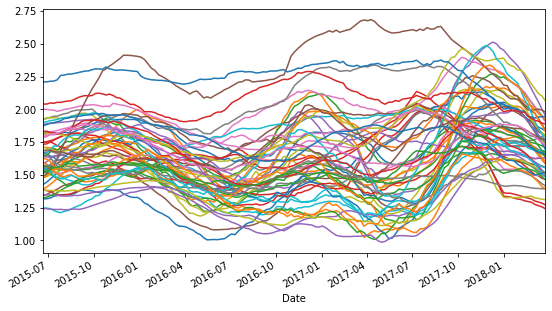

In [45]:
graph_df.dropna().plot(figsize=(9,5), legend=False)